In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

%matplotlib inline

In [118]:
train = pd.read_csv(r"F:\KaggleDataset\black-friday\train.csv")

In [119]:
train = pd.DataFrame(data = train)
total_miss = train.isnull().sum()
perc_miss = total_miss / train.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss, '% missing':perc_miss})

missing_data.sort_values(by='Total missing', ascending = False)

,Total missing,% missing
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


In [120]:
train.drop(['Product_Category_3'], axis = 1, inplace = True)

In [121]:
test = pd.read_csv(r"F:\KaggleDataset\black-friday\test.csv")

In [122]:
test = pd.DataFrame(data = test)
total_miss = test.isnull().sum()
perc_miss = total_miss / test.isnull().count() * 100

missing_data = pd.DataFrame({'Total missing':total_miss, '% missing':perc_miss})

missing_data.sort_values(by='Total missing', ascending=False).head()

,Total missing,% missing
Product_Category_3,162562,69.590195
Product_Category_2,72344,30.969311
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000


In [123]:
test.drop(['Product_Category_3'], axis = 1, inplace = True)

In [124]:
mean_train = train['Product_Category_2'].mean()
mean_test = test['Product_Category_2'].mean()

train['Product_Category_2'].fillna(mean_train, inplace=True)
test['Product_Category_2'].fillna(mean_test, inplace=True)

In [128]:
category_column =['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years'] 

for x in category_column:
    print (x)
    print (train[x].value_counts())
 
for col in category_column:
    b, c = np.unique(train[col], return_inverse=True) 
    train[col] = c

Product_ID
2536    1880
249     1615
1016    1612
1030    1562
565     1470
        ... 
1572       1
1571       1
809        1
730        1
1958       1
Name: Product_ID, Length: 3631, dtype: int64
Gender
1    414259
0    135809
Name: Gender, dtype: int64
Age
2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64
City_Category
1    231173
2    171175
0    147720
Name: City_Category, dtype: int64
Stay_In_Current_City_Years
1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64


In [129]:
category_column =['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years'] 

for x in category_column:
    print (x)
    print (test[x].value_counts())
 
for col in category_column:
    b, c = np.unique(test[col], return_inverse=True) 
    test[col] = c

Product_ID
2448    829
981     717
240     695
967     680
450     646
       ... 
1963      1
849       1
1451      1
1361      1
622       1
Name: Product_ID, Length: 3491, dtype: int64
Gender
1    175772
0     57827
Name: Gender, dtype: int64
Age
2    93428
3    46711
1    42293
4    19577
5    16283
6     9075
0     6232
Name: Age, dtype: int64
City_Category
1    98566
2    72509
0    62524
Name: City_Category, dtype: int64
Stay_In_Current_City_Years
1    82604
2    43589
3    40143
4    35945
0    31318
Name: Stay_In_Current_City_Years, dtype: int64


In [130]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

train_pr=['Gender','Age','Occupation','City_Category']

#set prediction data to factors that will predict, and set target to SalePrice
train_data = train[train_pr]
test_data = test[train_pr]
target = train.Purchase

#fitting model with prediction data and telling it my target
model.fit(train_data, target)

prediction=model.predict(test_data)
print(prediction)

[10042.17164414 10592.24617934  9003.89038634 ...  9014.78928571
  8571.93374903  7961.83237548]


In [131]:
model.score(train_data, target)

0.021779798313188214

In [132]:
prediction = prediction.reshape(len(prediction), 1)

dataTest = np.concatenate((test, prediction), axis = 1)

print(dataTest)

test['purchase prediction'] = prediction
test.sort_values('purchase prediction', inplace =True,ascending=False) 


[[1.00000400e+06 1.14400000e+03 1.00000000e+00 ... 1.00000000e+00
  1.10000000e+01 1.00421716e+04]
 [1.00000900e+06 9.94000000e+02 1.00000000e+00 ... 3.00000000e+00
  5.00000000e+00 1.05922462e+04]
 [1.00001000e+06 2.67200000e+03 0.00000000e+00 ... 5.00000000e+00
  1.40000000e+01 9.00389039e+03]
 ...
 [1.00603600e+06 3.03000000e+02 0.00000000e+00 ... 1.00000000e+00
  5.00000000e+00 9.01478929e+03]
 [1.00603700e+06 1.10500000e+03 0.00000000e+00 ... 1.00000000e+01
  1.60000000e+01 8.57193375e+03]
 [1.00603900e+06 2.92100000e+03 0.00000000e+00 ... 4.00000000e+00
  5.00000000e+00 7.96183238e+03]]


In [133]:
print("Original ")
print(train.shape)

print("\nAfter removing")
train = train.iloc[:233599]

print(train.shape)

Original 
(550068, 11)

After removing
(233599, 11)


In [135]:
category_column = ['purchase prediction'] 
for x in category_column:
    print (x)
    print (test[x].value_counts())


for col in category_column:
    b, c = np.unique(test[col], return_inverse=True) 
    test[col] = c
 

purchase prediction
344    6199
248    5236
203    5207
462    4020
185    3206
       ... 
17        4
221       4
7         4
583       4
1         3
Name: purchase prediction, Length: 588, dtype: int64


In [136]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
X = train[['Purchase']].values
y = test[['purchase prediction']].values

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf.score(X_train, y_train)
predn = clf.predict(X_test)
print('The accuracy of the model using decision tree is', metrics.accuracy_score(predn, y_test))

The accuracy of the model using decision tree is 0.967744006849315


In [146]:
clf.score(X_train, y_train)

0.9695257359039806

# Visualization

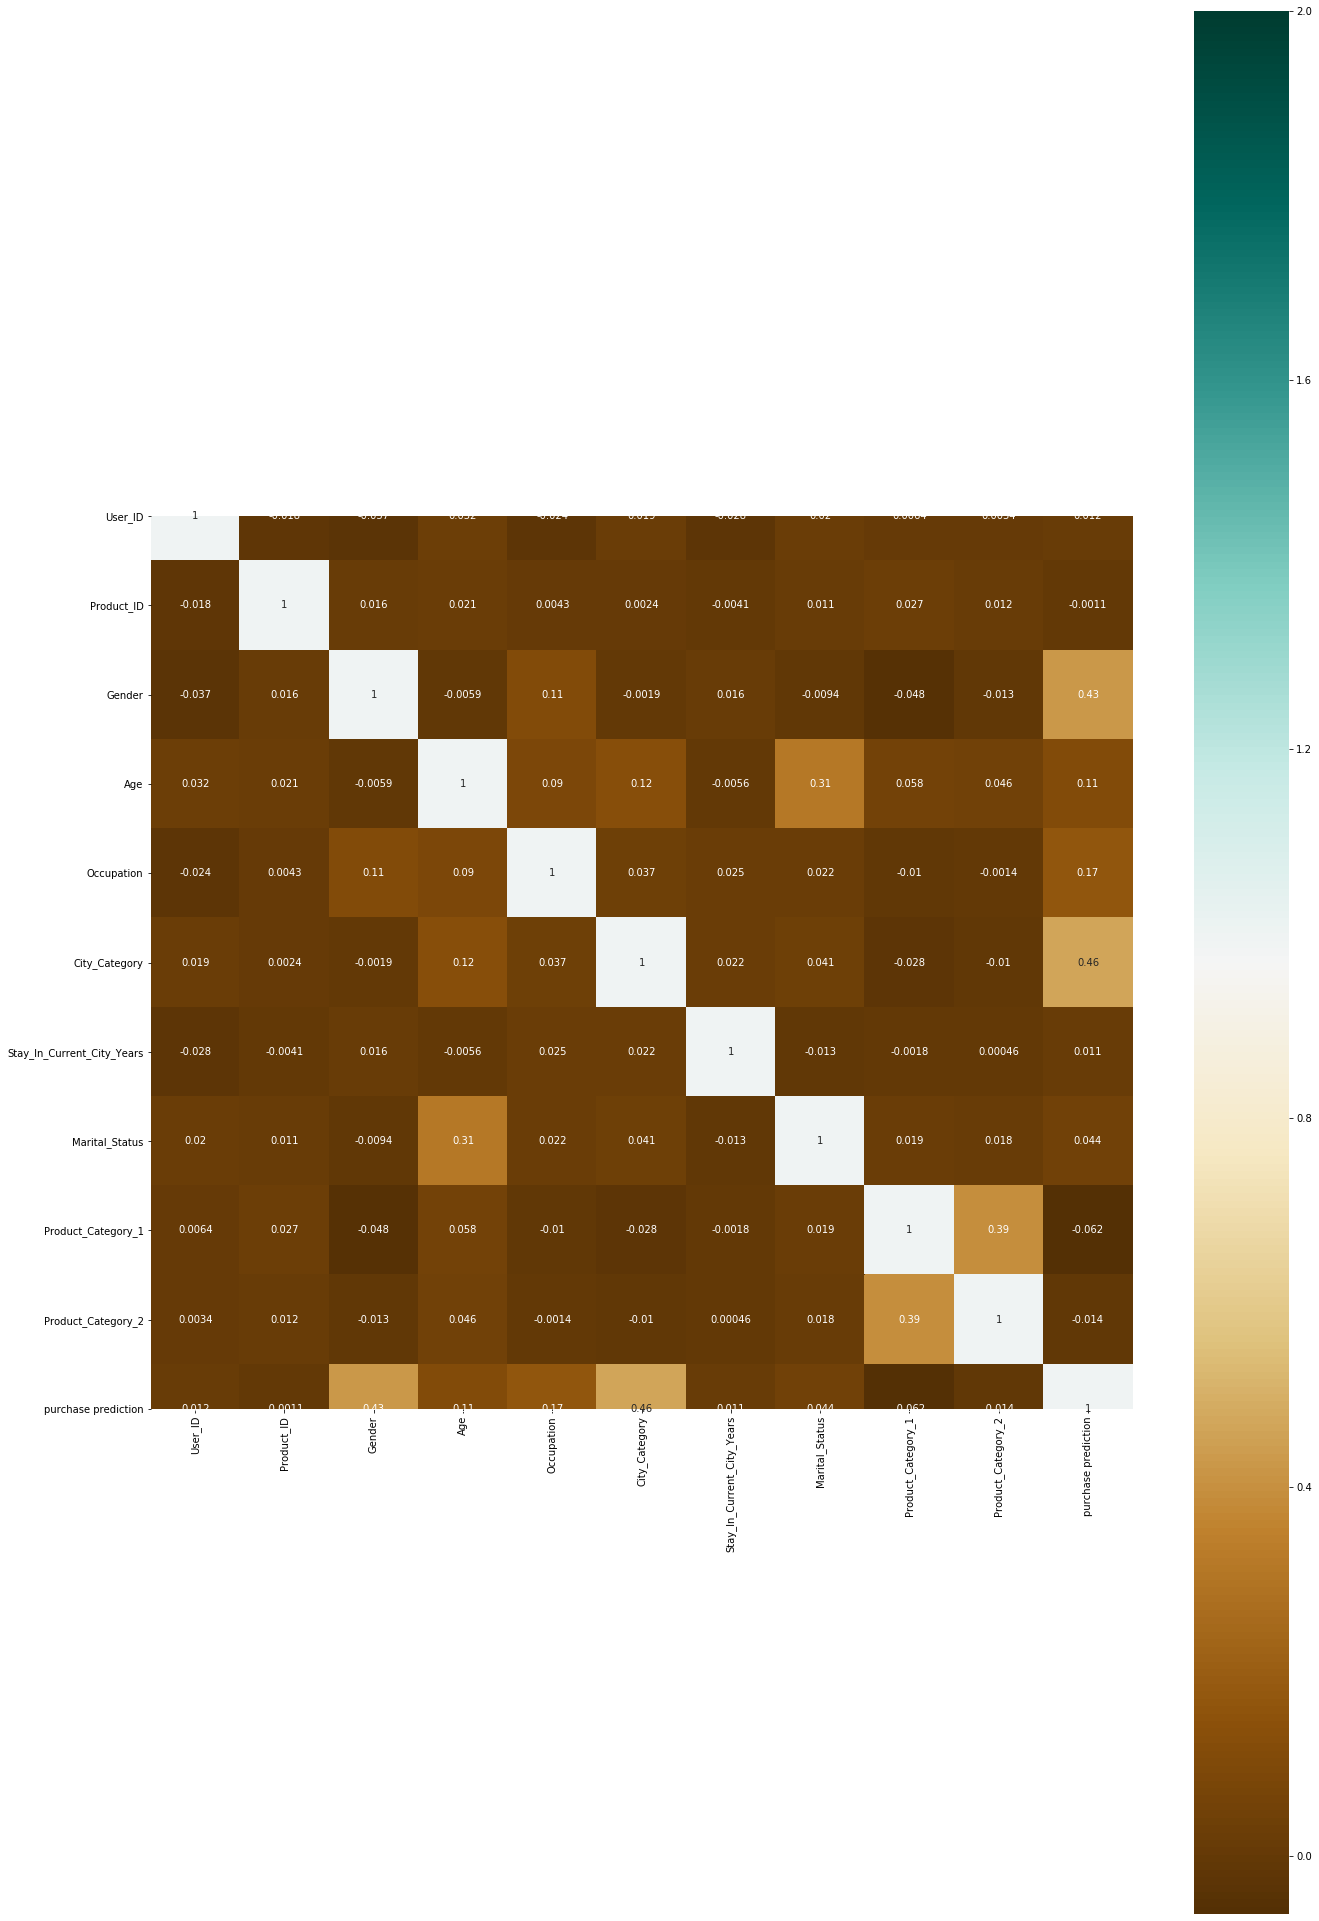

In [54]:
hmap = test.corr()
plt.subplots(figsize=(22,35))
sns.heatmap(hmap, vmax=2,annot=True,cmap="BrBG", square=True);

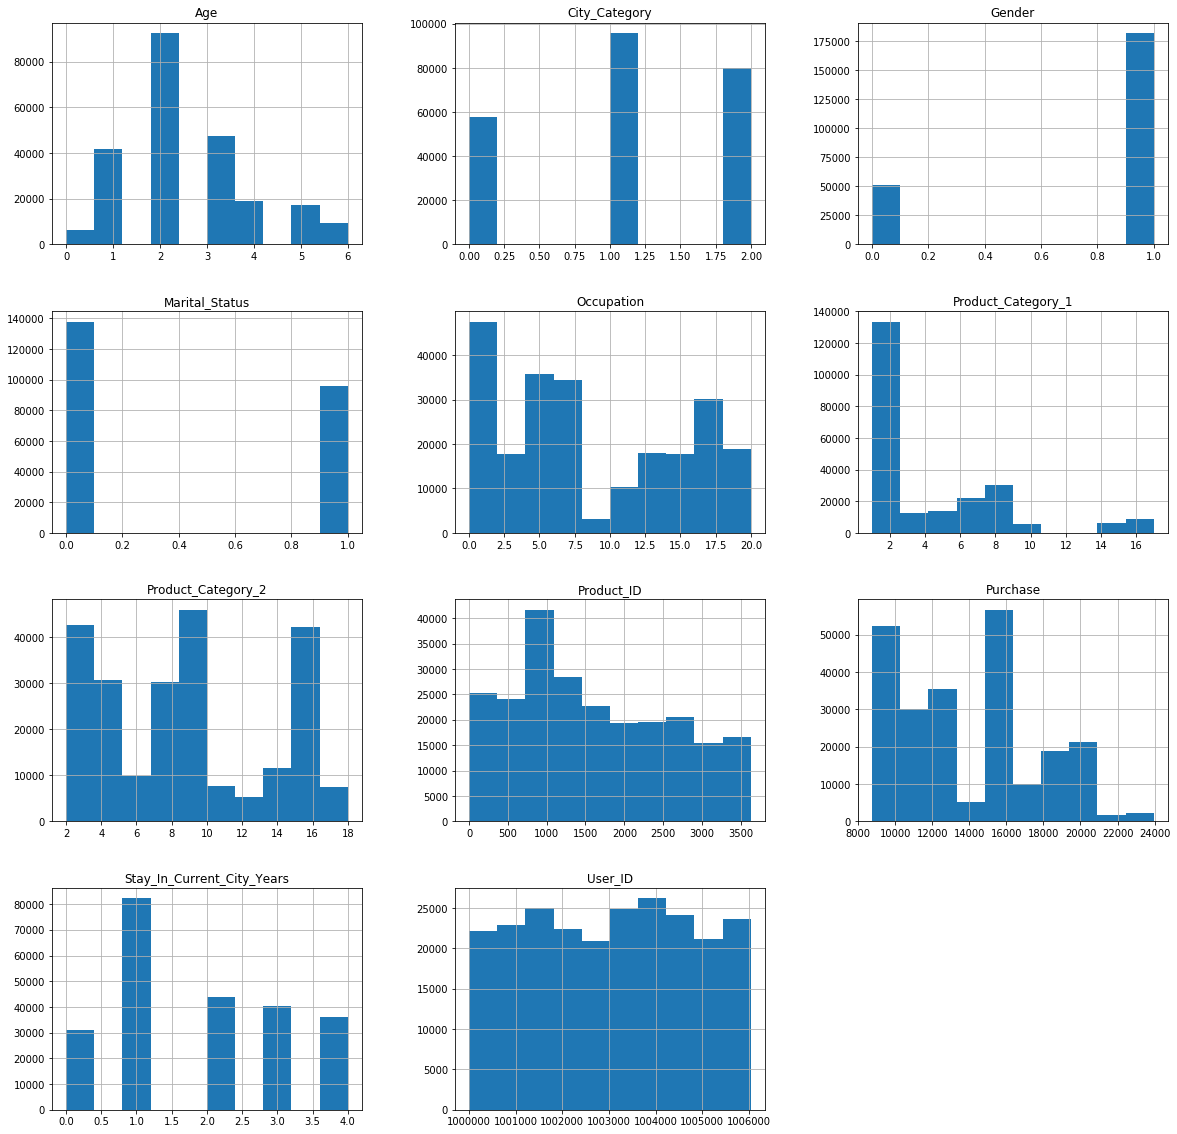

In [55]:
train.hist(figsize = (20, 20))
plt.show()

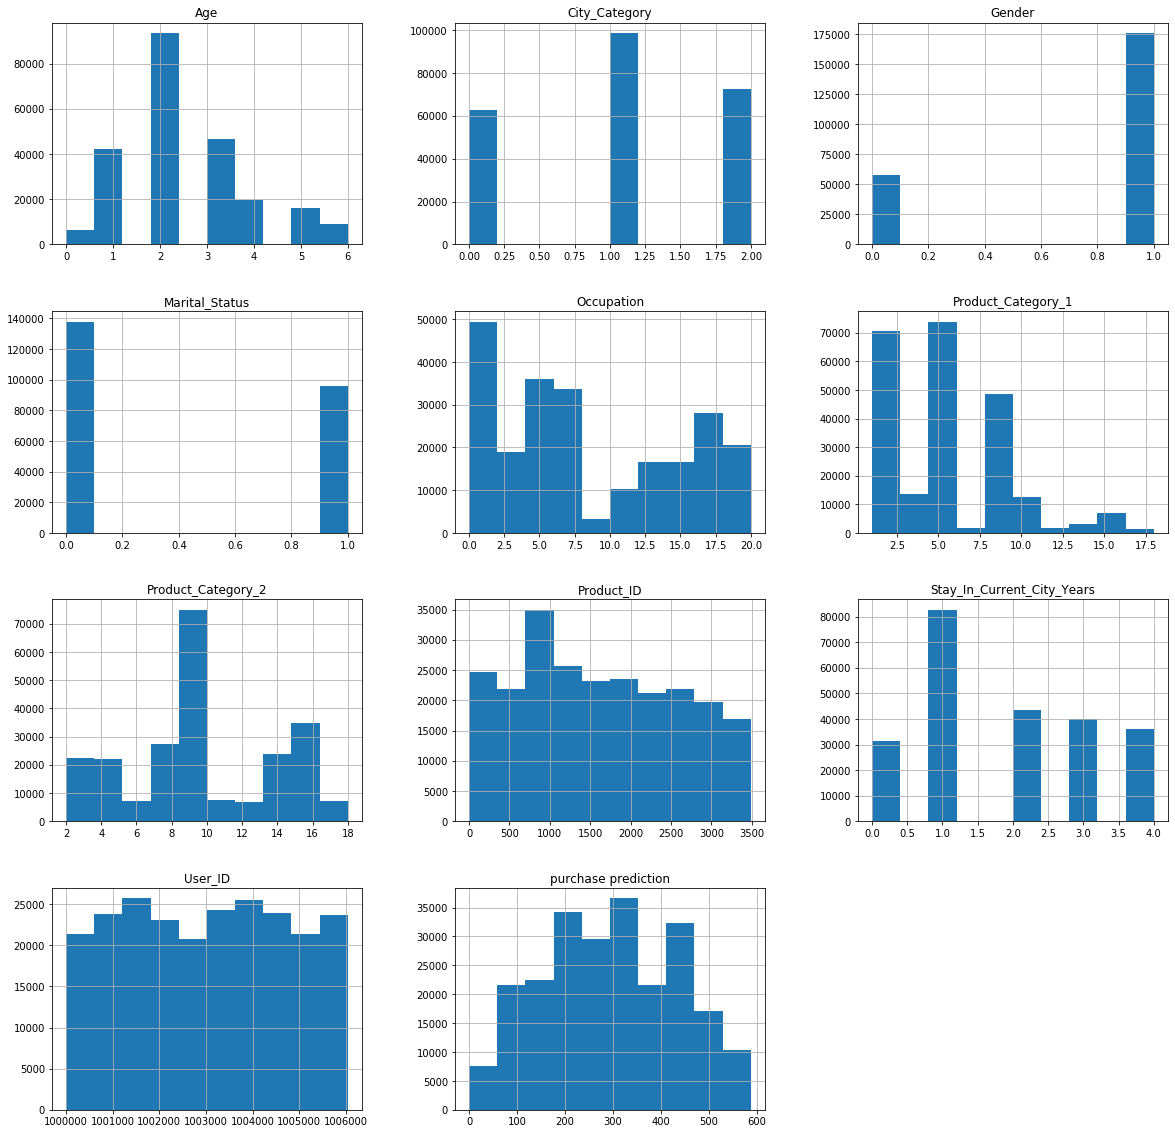

In [56]:
test.hist(figsize = (20, 20))
plt.show()

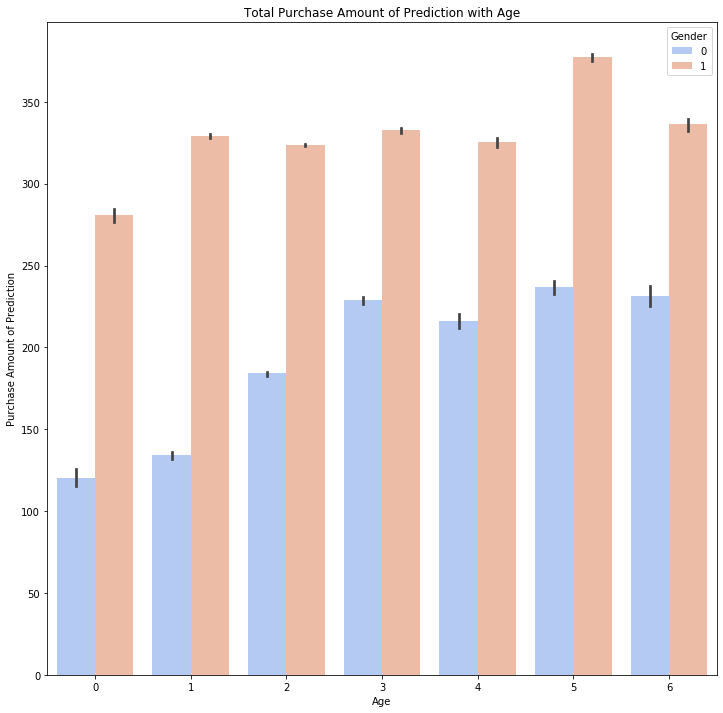

In [57]:

plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Age',y='purchase prediction',data=test,hue='Gender' ,palette='coolwarm')
g = g.set_ylabel("Purchase Amount of Prediction")
plt.title('Total Purchase Amount of Prediction with Age')

plt.show()

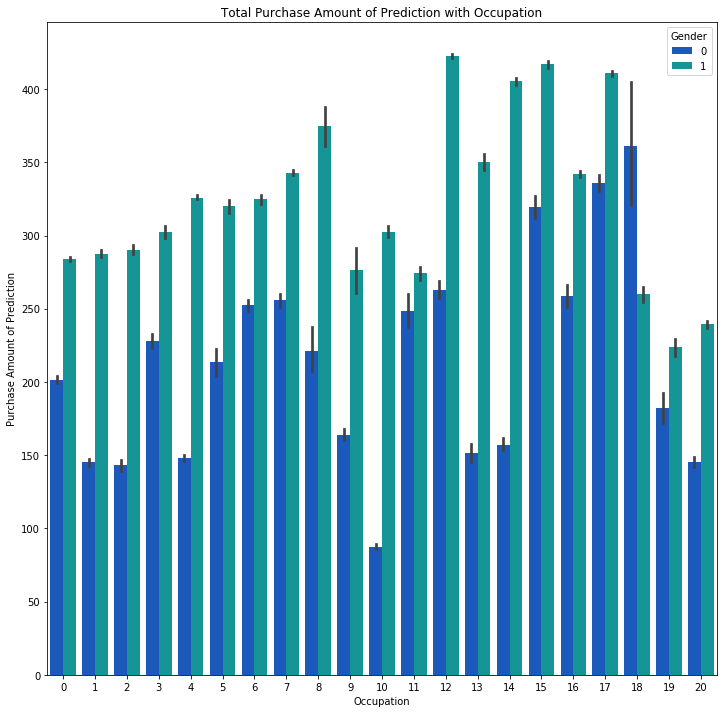

In [58]:

plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Occupation',y='purchase prediction',data = test, hue='Gender' ,palette='winter')
g = g.set_ylabel("Purchase Amount of Prediction")
plt.title('Total Purchase Amount of Prediction with Occupation')

plt.show()

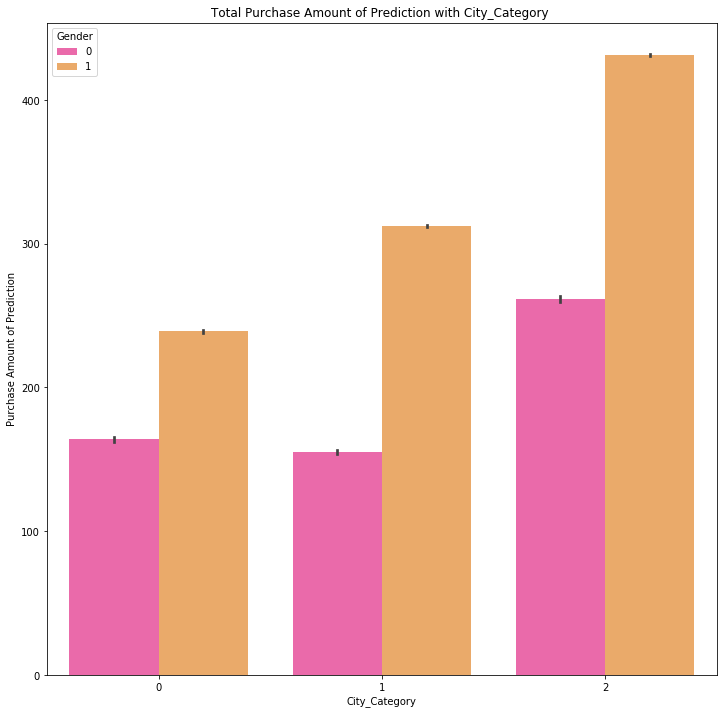

In [59]:

plt.subplots(figsize=(12, 12))
g = sns.barplot(x='City_Category',y='purchase prediction',data=test,hue='Gender' ,palette='spring')
g = g.set_ylabel("Purchase Amount of Prediction")
plt.title('Total Purchase Amount of Prediction with City_Category ')

plt.show()

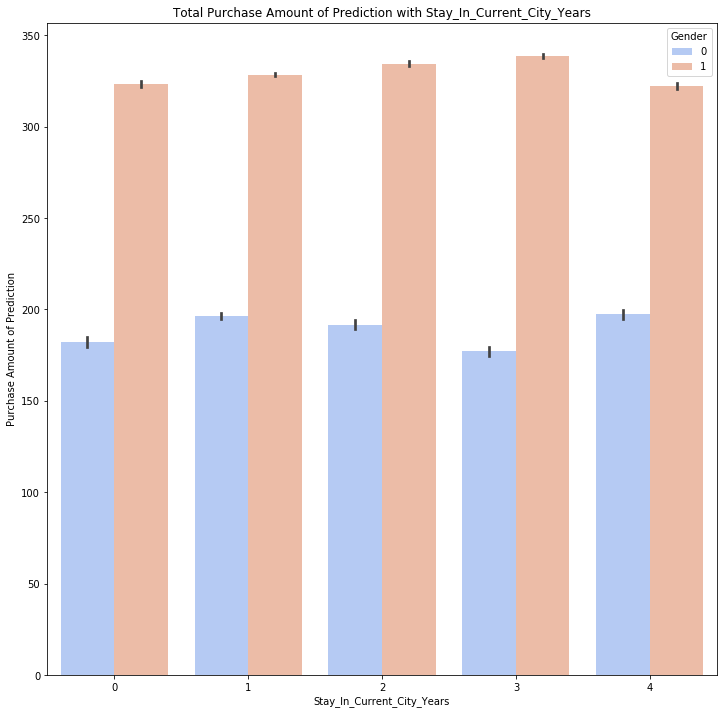

In [60]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Stay_In_Current_City_Years',y='purchase prediction',data=test,hue='Gender' ,palette='coolwarm')
g = g.set_ylabel("Purchase Amount of Prediction")
plt.title('Total Purchase Amount of Prediction with Stay_In_Current_City_Years')

plt.show()

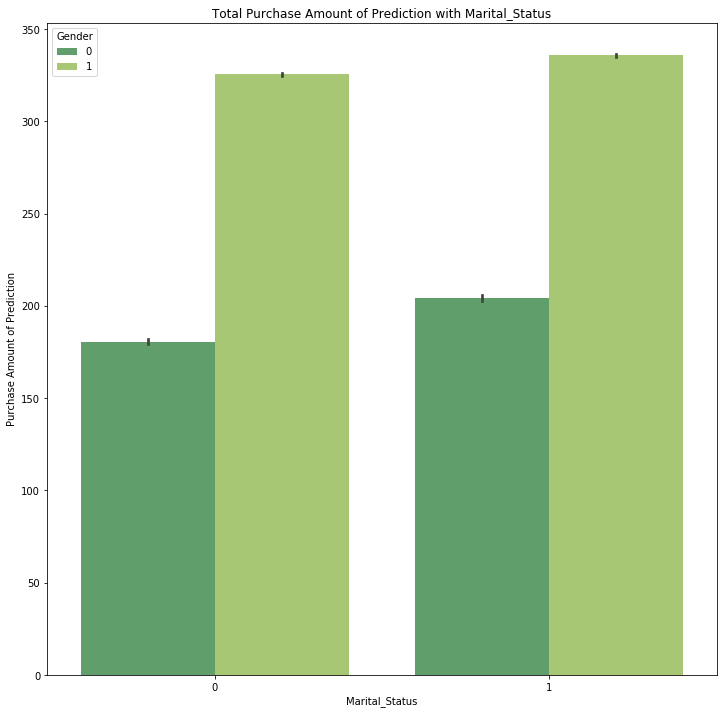

In [61]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Marital_Status',y='purchase prediction',data=test,hue='Gender' ,palette='summer')
g = g.set_ylabel("Purchase Amount of Prediction")
plt.title('Total Purchase Amount of Prediction with Marital_Status')

plt.show()

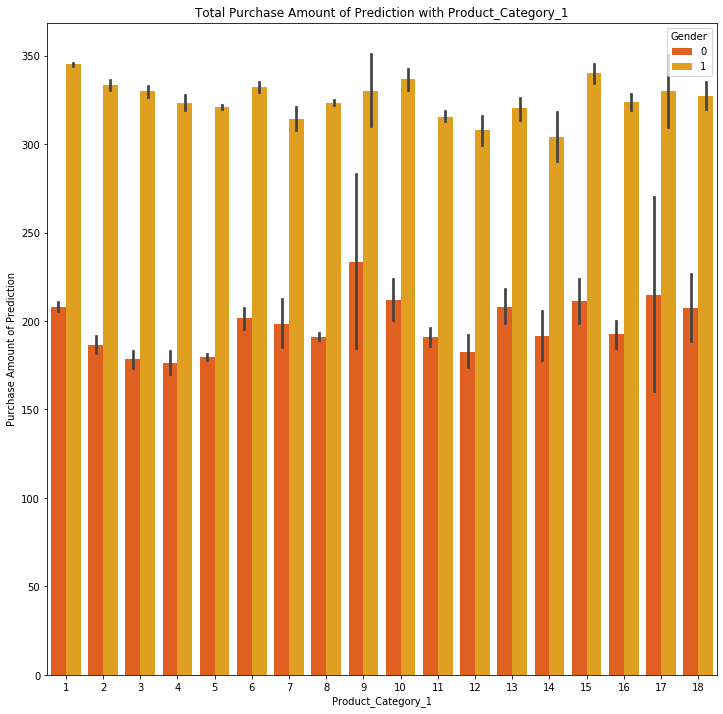

In [62]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Product_Category_1',y='purchase prediction',data=test,hue='Gender' ,palette='autumn')
g = g.set_ylabel("Purchase Amount of Prediction")
plt.title('Total Purchase Amount of Prediction with Product_Category_1')

plt.show()

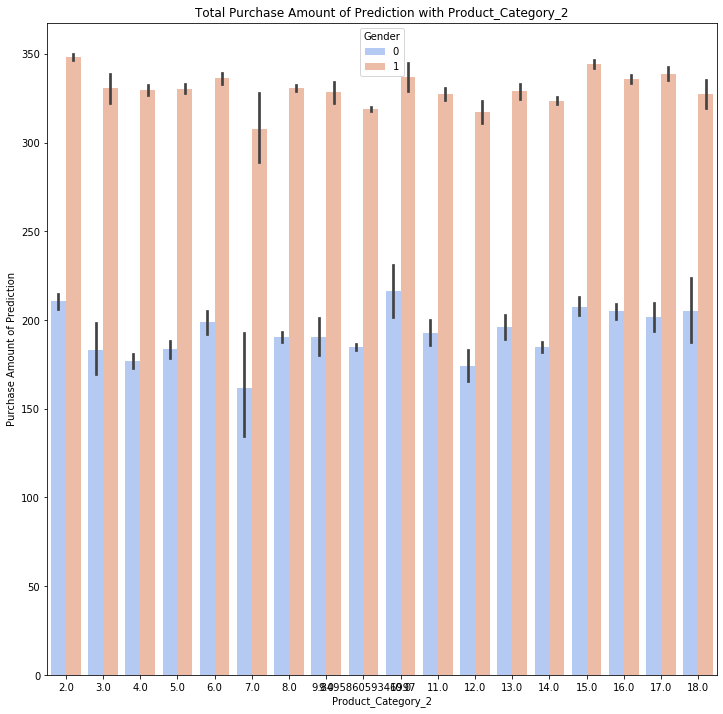

In [63]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Product_Category_2',y='purchase prediction',data=test,hue='Gender' ,palette='coolwarm')
g = g.set_ylabel("Purchase Amount of Prediction")
plt.title('Total Purchase Amount of Prediction with Product_Category_2')

plt.show()

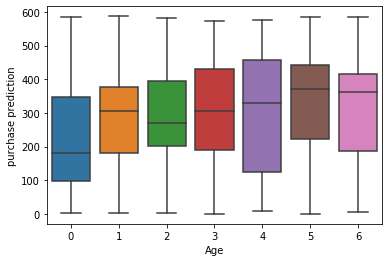

In [64]:
sns.boxplot(x='Age',y='purchase prediction',data=test)

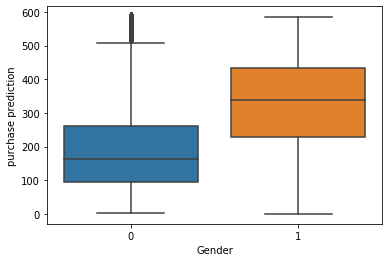

In [65]:

sns.boxplot(x='Gender',y='purchase prediction',data=test)

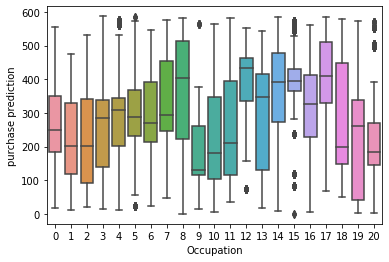

In [66]:
sns.boxplot(x='Occupation',y='purchase prediction',data=test)

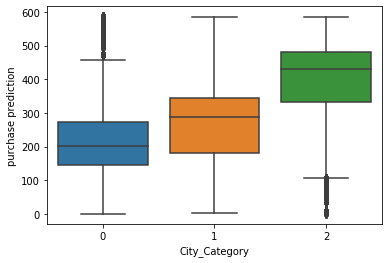

In [67]:
sns.boxplot(x='City_Category',y='purchase prediction',data=test)

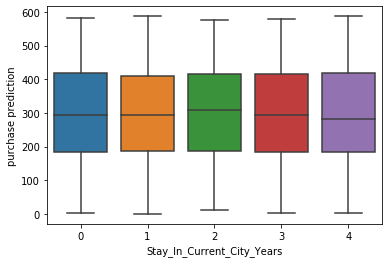

In [68]:
sns.boxplot(x='Stay_In_Current_City_Years',y='purchase prediction',data=test)

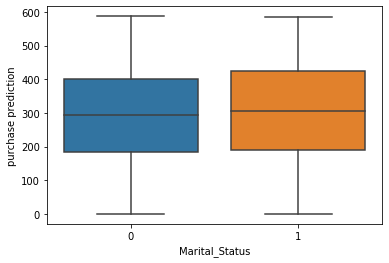

In [69]:
sns.boxplot(x='Marital_Status',y='purchase prediction',data=test)

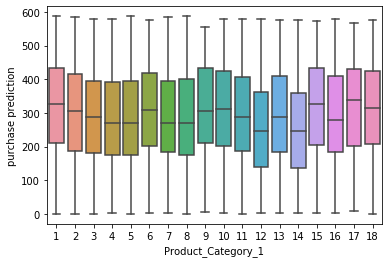

In [70]:
sns.boxplot(x='Product_Category_1',y='purchase prediction',data=test)

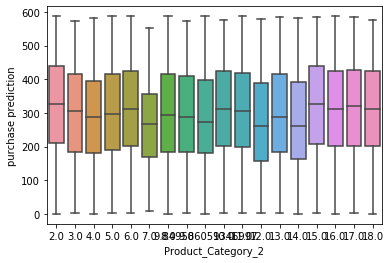

In [72]:
sns.boxplot(x='Product_Category_2',y='purchase prediction',data=test)


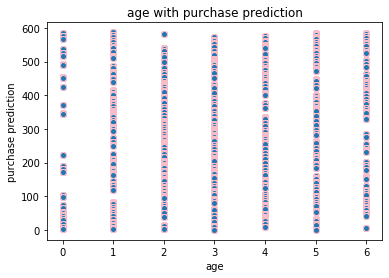

In [89]:
age=test['Age']

pp = test['purchase prediction']
plt.scatter(age,pp, edgecolors='pink')
plt.xlabel('age')
plt.ylabel('purchase prediction')
plt.title('age with purchase prediction')
plt.show()

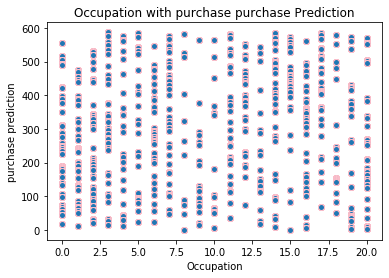

In [88]:
oc=test['Occupation']

pp = test['purchase prediction']
plt.scatter(oc,pp, edgecolors='pink')
plt.xlabel('Occupation')
plt.ylabel('purchase prediction')
plt.title('Occupation with purchase purchase Prediction')
plt.show()

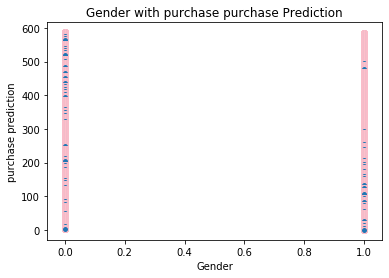

In [87]:
oc=test['Gender']

pp = test['purchase prediction']
plt.scatter(oc,pp, edgecolors='pink')
plt.xlabel('Gender')
plt.ylabel('purchase prediction')
plt.title('Gender with purchase purchase Prediction')
plt.show()

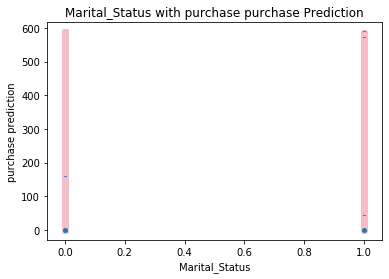

In [86]:
oc=test['Marital_Status']

pp = test['purchase prediction']
plt.scatter(oc,pp, edgecolors='pink')
plt.xlabel('Marital_Status')
plt.ylabel('purchase prediction')
plt.title('Marital_Status with purchase purchase Prediction')
plt.show()

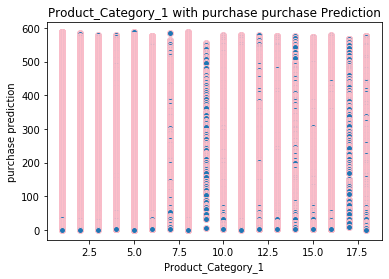

In [85]:
oc=test['Product_Category_1']

pp = test['purchase prediction']
plt.scatter(oc,pp, edgecolors='pink')
plt.xlabel('Product_Category_1')
plt.ylabel('purchase prediction')
plt.title('Product_Category_1 with purchase purchase Prediction')
plt.show()

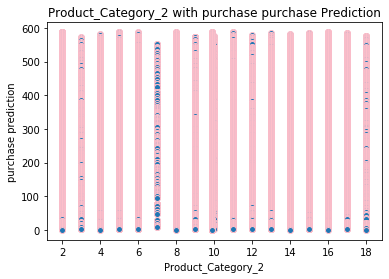

In [83]:
oc=test['Product_Category_2']

pp = test['purchase prediction']
plt.scatter(oc,pp, edgecolors='pink')
plt.xlabel('Product_Category_2')
plt.ylabel('purchase prediction')
plt.title('Product_Category_2 with purchase purchase Prediction')
plt.show()